# Credit Risk Management: Classification Models & Hyperparameter Tuning

## Business Application 
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase
## Dataset
The datasets contains transactions made by credit cards in September 2013 by european cardholders.
It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.
## agenda
End to end project to solve credit card classification problem
EDA
Feature engineering
Modelling

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [29]:
# Column names: remove white spaces and convert to lower case
df.columns= df.columns.str.strip().str.lower()
df.columns

Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class'],
      dtype='object')

In [47]:
df['class'].value_counts()

0    252502
1       401
Name: class, dtype: int64

In [30]:
data = df.sample(frac= 0.2)


<Figure size 1080x720 with 0 Axes>

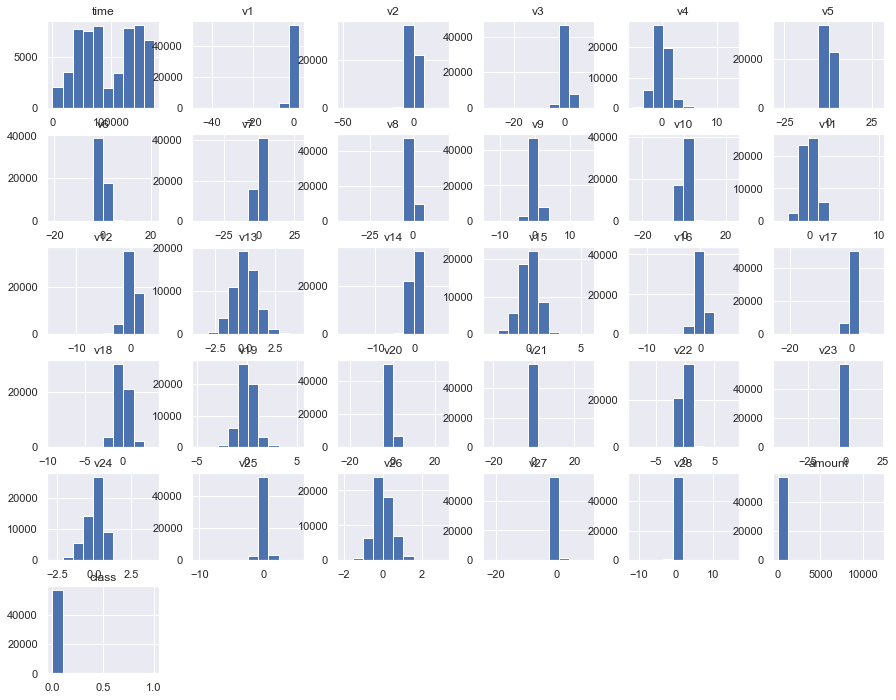

In [31]:
fig = plt.figure(figsize=(15,10))
data.hist(figsize=(15,12))
plt.show()

In [26]:
sns.set()

{'whiskers': [<matplotlib.lines.Line2D at 0x1c68a930d88>,
 'caps': [<matplotlib.lines.Line2D at 0x1c68a938e88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c68fb6d948>],
 'medians': [<matplotlib.lines.Line2D at 0x1c68a93fc48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c68a93fe48>],
 'means': []}

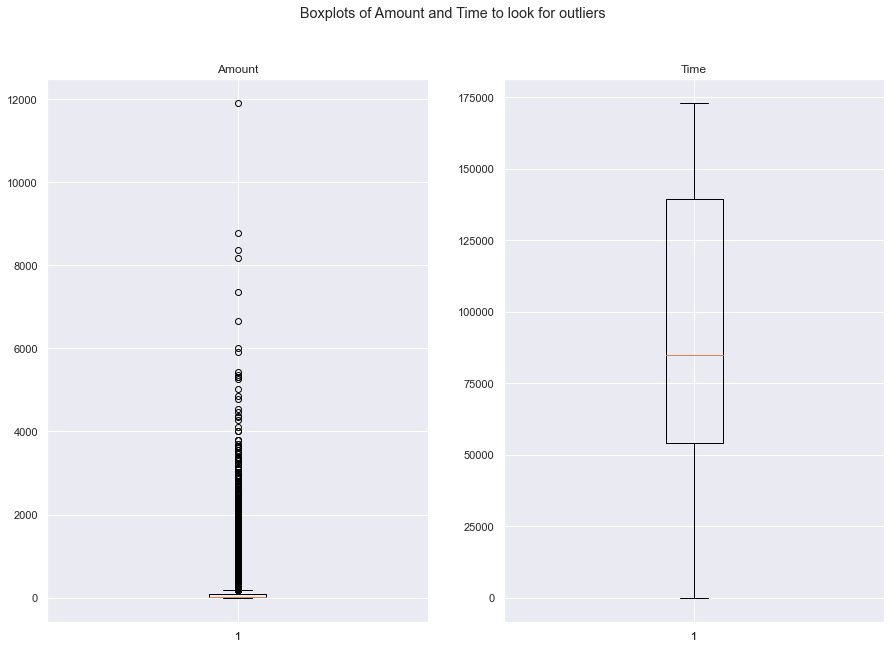

In [41]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize = (15,10))
fig.suptitle('Boxplots of Amount and Time to look for outliers')
ax[0].set_title('Amount')
ax[0].boxplot(data.amount)
ax[1].set_title('Time')
ax[1].boxplot(data.time)

C:\Users\Festus\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='amount'>

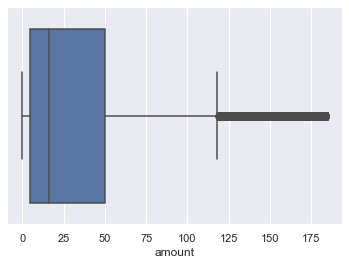

In [33]:
def remove_outlier(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*1.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper

lower, upper = remove_outlier(df.amount)

df = df.loc[(df.amount > lower) & (df.amount < upper)]

sns.boxplot(df.amount)

In [36]:
data['class'].value_counts()

0    56859
1      102
Name: class, dtype: int64

<AxesSubplot:>

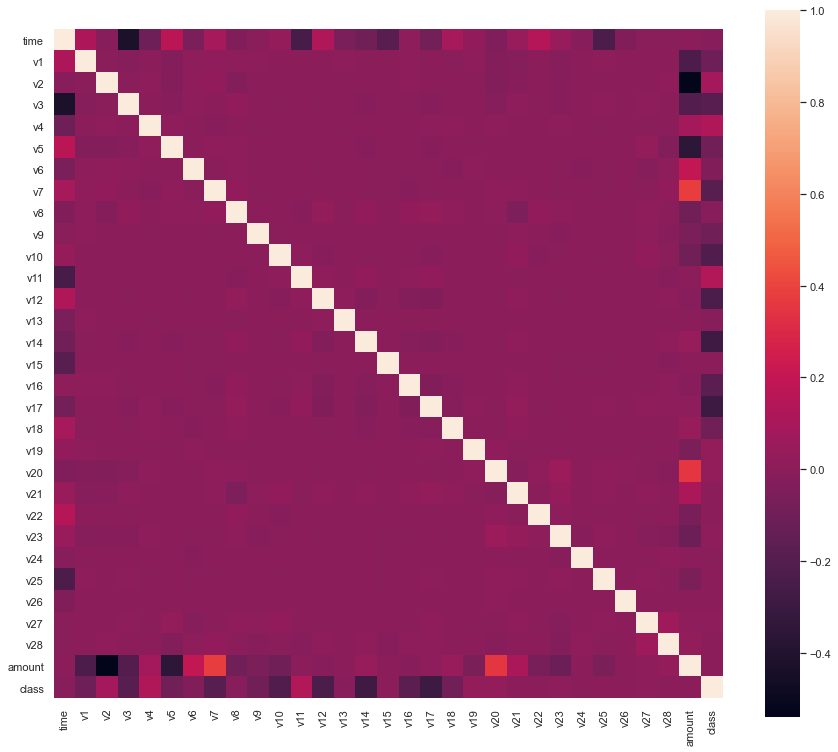

In [40]:
data_corr = data.corr()
plt.figure(figsize = (15,13))
sns.heatmap(data_corr,square =True)

In [52]:
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

X.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount
138768,82834.0,-0.922409,0.176872,1.684077,0.150947,-0.162739,0.299308,0.780597,0.269542,-0.470607,...,0.170209,0.417619,0.841516,0.255163,-0.014021,-0.307492,-0.516553,0.112066,0.162899,163.80
10936,18768.0,0.683958,-0.662159,2.101559,3.223243,-1.228647,1.602507,-1.166806,0.460169,2.097177,...,0.199198,0.057114,0.484771,-0.319794,0.022789,0.415735,0.193942,0.033409,0.052069,182.22
88000,61940.0,-1.854351,-0.134415,1.351135,0.031077,1.101336,-2.066509,0.025744,-0.141300,-0.016173,...,-0.225505,-0.247138,-0.633045,-0.048374,0.676969,-0.475521,-0.118858,0.097905,0.417538,9.70
163098,115647.0,1.889484,-0.785959,-0.687501,0.211734,-0.449629,0.305299,-0.739831,0.176538,1.180053,...,-0.062963,0.177279,0.522079,-0.022393,-0.995444,-0.224606,0.607730,-0.041381,-0.057389,74.99
221957,142763.0,-0.753242,1.137093,1.499358,0.974572,-0.138547,0.020108,0.089924,0.482301,-0.593904,...,0.046601,-0.011621,-0.113162,0.071377,1.122885,-0.314383,-0.812193,0.078051,0.094309,20.00


In [53]:
X.shape

(56961, 30)

In [54]:
#3. Feature Scaling (Data Standardization/Normalization)

#3.1. df_a (encoded without target)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)
x_scaled.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount
0,-0.252018,-0.476155,0.107527,1.116327,0.106661,-0.117492,0.232069,0.633669,0.233826,-0.426767,...,0.219419,0.552283,1.155303,0.388695,-0.018574,-0.584957,-1.064510,0.277580,0.519640,0.305230
1,-1.598228,0.352851,-0.400196,1.394329,2.281852,-0.903883,1.220377,-0.956194,0.397734,1.904274,...,0.257532,0.068144,0.665223,-0.493242,0.042210,0.806100,0.401408,0.080296,0.165485,0.380584
2,-0.691061,-0.957108,-0.080842,0.894619,0.021793,0.815099,-1.562098,0.017405,-0.119431,-0.014231,...,-0.300859,-0.340451,-0.870381,-0.076905,1.122476,-0.908144,-0.243971,0.242062,1.333333,-0.325176
3,0.437476,0.974993,-0.475111,-0.462917,0.149698,-0.329150,0.236612,-0.607611,0.153858,1.071706,...,-0.087152,0.229518,0.716475,-0.037052,-1.639224,-0.425534,1.255151,-0.107293,-0.184286,-0.058082
4,1.007261,-0.388852,0.688586,0.993321,0.689789,-0.099644,0.020331,0.069802,0.416764,-0.538696,...,0.056902,-0.024163,-0.156190,0.106783,1.858828,-0.598211,-1.674485,0.192266,0.300461,-0.283040


In [62]:
#4.1. Oversampling (SMOTE: Synthetic Minority Oversampling Technique)

from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.4)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
x_scaled_over, y_over = pipeline.fit_resample(x_scaled, Y)
print(Counter(y_over))

Counter({0: 14212, 1: 5685})


In [63]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled_over, y_over, test_size=0.3, random_state=1)

In [64]:
#Modelling
#6. Apply algorithm 
# Models to be tested: L ogistic Regression, KNearest, SVM, Decision Tree, Random Forest, XGBoost, LightGBM

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [67]:
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier()
}

In [68]:
#Compute the training score of each models

train_scores = []
test_scores = []

for key, classifier in classifiers.items():
    classifier.fit(x_train, y_train)
    train_score = round(classifier.score(x_train, y_train),2)
    train_scores.append(train_score)
    test_score = round(classifier.score(x_test, y_test),2)
    test_scores.append(test_score)

print(train_scores)
print(test_scores)

[0.95, 0.99, 0.97, 1.0, 1.0]
[0.95, 0.99, 0.97, 0.98, 1.0]


In [70]:
%%time
from sklearn.model_selection import cross_val_score

train_cross_scores = []
test_cross_scores = []

for key, classifier in classifiers.items():
    classifier.fit(x_train, y_train)
    train_score = cross_val_score(classifier, x_train, y_train, cv=5)
    train_cross_scores.append(round(train_score.mean(),2))
    test_score = cross_val_score(classifier, x_test, y_test, cv=5)
    test_cross_scores.append(round(test_score.mean(),2))
    
print(train_cross_scores)
print(test_cross_scores)

C:\Users\Festus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0.95, 0.99, 0.97, 0.98, 1.0]
[0.95, 0.98, 0.96, 0.97, 0.99]
Wall time: 3min 6s


In [75]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred = cross_val_predict(rf, x_test, y_test, cv=5)


In [74]:
print(roc_auc_score(y_test, rf_pred))

0.9888840326340326
